## 데이터 불러오기


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 불러오기 및 전처리 과정
d1_df_raw = pd.read_excel("D1.xlsx")
d2_df_raw = pd.read_excel("D2.xlsx")



## 데이터 전처리

In [36]:
d1_df = d1_df_raw.copy()
d2_df = d2_df_raw.copy()

df = pd.merge(left=d1_df, right=d2_df, on="Timestamp", how="left")

drop_columns = ['8PI_P4251A.PV - Average', 'LAB_8CHIP_TIO2 - Average', 
                'LAB_8CHIP_HEAT - Average', 'LAB_8CHIP_SIZE - Average',
                '8FIC_P4230B.PV - Average', '8TIC_E9340.PV - Average', 
                '8FIC_P4260B.PV - Average', '8FIC_F4270B.PV - Average']
df = df.drop(columns=drop_columns)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[df['Timestamp'] > '2019-04-01 00:00:00']
df

Timestamp  8PIC_D4210.PV - Average  8DIC_P4240.PV - Average  \
33120 2019-04-01 00:00:01                95.898014                 1.291356   
33121 2019-04-01 00:01:01                92.829526                 1.291299   
33122 2019-04-01 00:02:01                93.939315                 1.291422   
33123 2019-04-01 00:03:01                90.607255                 1.291556   
33124 2019-04-01 00:04:01                91.121162                 1.291409   
...                   ...                      ...                      ...   
44636 2019-04-08 23:56:01                92.406773                 1.289291   
44637 2019-04-08 23:57:01                95.989672                 1.289338   
44638 2019-04-08 23:58:01                91.030069                 1.289334   
44639 2019-04-08 23:59:01                89.416705                 1.289181   
44640 2019-04-09 00:00:01                91.466351                 1.289107   

       8XIC_P4260.PV - Average  8XIC_P4230.PV - Average  \
33120                 2.411836                 2.176456   
33121                 2.418729                 2.176419   
33122                 2.432156                 2.176859   
33123                 2.439806                 2.176201   
33124                 2.464230                 2.174812   
...                        ...                      ...   
44636                 2.499553                 2.184280   
44637                 2.487310                 2.184079   
44638                 2.489134                 2.185753   
44639                 2.485261                 2.187425   
44640                 2.483569                 2.186081   

       8SIC_M4220.PV - Average  8FIC_P4260A.PV - Average  \
33120                15.876209               3451.104950   
33121                15.875143               3464.715961   
33122                15.835105               3464.875696   
33123                15.816150               3477.019873   
33124                15.691775               3487.631842   
...                        ...                       ...   
44636                14.919949               3365.251721   
44637                15.029746               3375.474963   
44638                15.074050               3387.073871   
44639                15.129406               3386.646143   
44640                15.166513               3391.757971   

       8FFIC_P4230.PV - Average  8FIC_P4230A.PV - Average  \
33120                  1.189474               4099.403664   
33121                  1.189389               4121.884713   
33122                  1.190503               4123.096899   
33123                  1.185462               4143.642794   
33124                  1.187684               4157.368522   
...                         ...                       ...   
44636                  1.191326               3997.801805   
44637                  1.189223               4020.532446   
44638                  1.187732               4035.794836   
44639                  1.189508               4034.750795   
44640                  1.192863               4042.226858   

       8FIC_P4240B.PV - Average  ...  8TI_E9330D.PV - Average  \
33120                  5.552360  ...               283.366624   
33121                  5.501360  ...               283.427570   
33122                  5.480042  ...               283.396290   
33123                  5.421992  ...               283.374080   
33124                  5.554348  ...               283.460066   
...                         ...  ...                      ...   
44636                  5.491773  ...               283.340788   
44637                  5.483202  ...               283.304887   
44638                  5.628804  ...               283.313058   
44639                  5.624566  ...               283.331335   
44640                  5.489996  ...               283.303519   

       8TI_E9330C.PV - Average  8TI_E9330B.PV - Average  \
33120               283.664514               282.577584   
33121

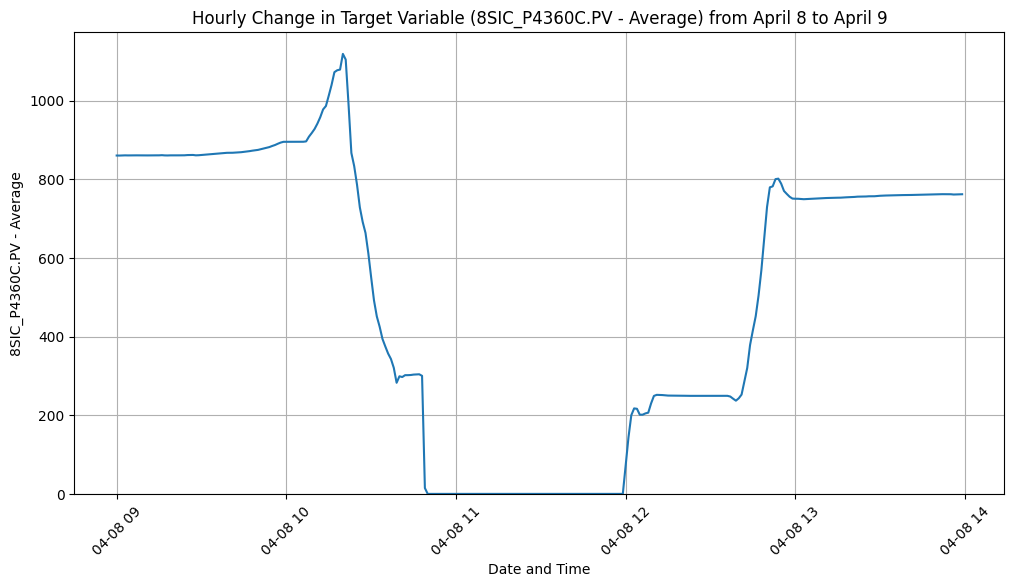

In [ ]:
# Timestamp를 인덱스로 설정 
if df.index.name != 'Timestamp':
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Timestamp 열을 datetime 형식으로 변환
    df = df.set_index('Timestamp')

# 특정 날짜 범위 필터링 (4월 8일부터 4월 9일)
start_datetime = '2019-04-08 09:00:00'
end_datetime = '2019-04-08 13:59:59'
filtered_data = df.loc[start_datetime:end_datetime]

# 필터링된 데이터가 있는지 확인하고 시각화 진행
if not filtered_data.empty:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data.index, filtered_data["8SIC_P4360C.PV - Average"], linestyle='-')
    plt.title("Hourly Change in Target Variable (8SIC_P4360C.PV - Average) from April 8 to April 9")
    plt.xlabel("Date and Time")
    plt.ylabel("8SIC_P4360C.PV - Average")
    plt.ylim(bottom=0)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("선택한 날짜 범위에 데이터가 없습니다.")


## 타겟 시계열 그래프

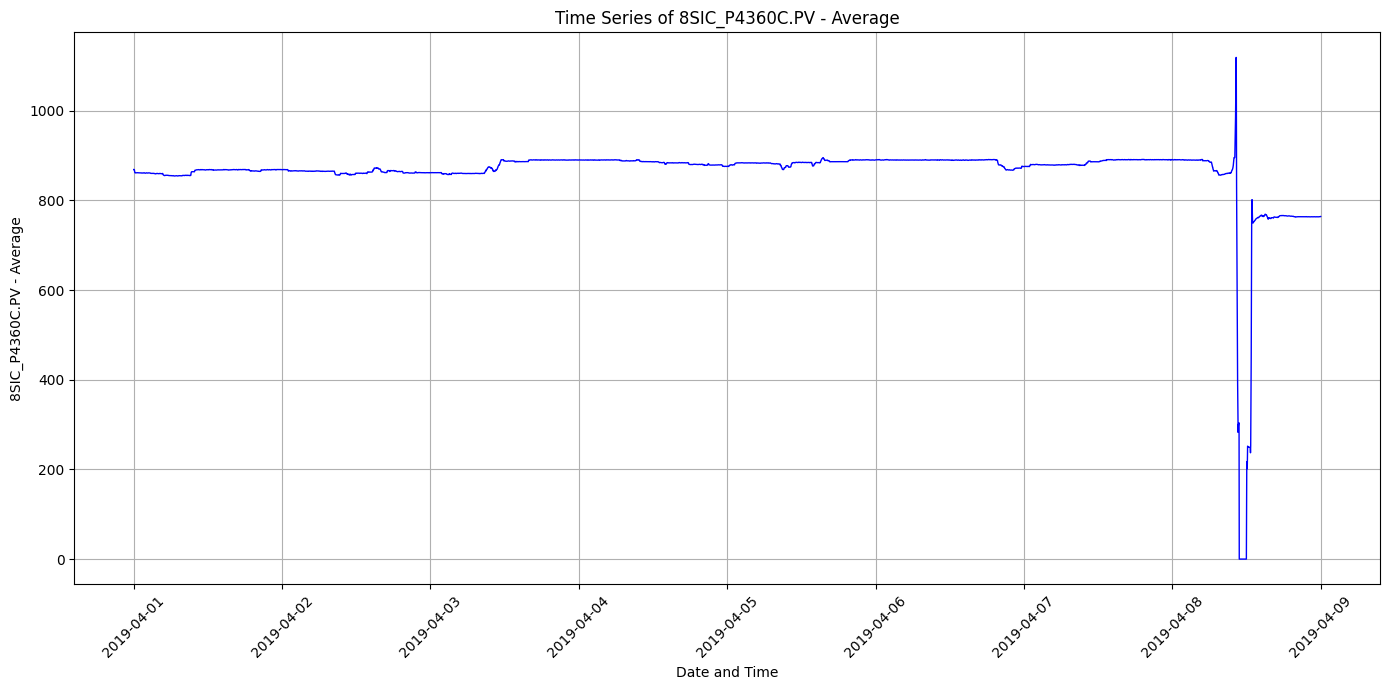

In [22]:
# 시계열 그래프 그리기
plt.figure(figsize=(14, 7))
plt.plot(df.index, df[target_var], color='blue', linestyle='-', linewidth=1)
plt.title(f"Time Series of {target_var}")
plt.xlabel("Date and Time")
plt.ylabel(target_var)
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블을 기울여서 표시
plt.tight_layout()
plt.show()

## CCF 상위 10개 변수 

In [4]:
# 타겟 변수 및 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'
variables = [col for col in df.columns if col != target_var and col != "Timestamp"]

# 상관계수와 lag 정보를 저장할 리스트
best_lags = []

# 양의 lag만을 고려한 ccf 계산
max_lag = 4500  # 원하는 최대 양의 lag 값 설정
for var in variables:
    cross_corr = sm.tsa.stattools.ccf(df[target_var], df[var], adjusted=False)

    # 가장 높은 상관 관계와 해당 lag 찾기
    best_corr = np.max(cross_corr)
    best_lag = np.argmax(cross_corr)

    # 결과 저장
    best_lags.append((var, best_corr, best_lag))

# 결과를 DataFrame으로 정리하고 상관계수가 높은 순으로 정렬
best_lags_df = pd.DataFrame(best_lags, columns=['변수명', '상관계수', 'lag'])
top_10_lags_df = best_lags_df.sort_values(by='상관계수', ascending=False).head(10)

# 결과 출력
print("상위 10개의 변수와 해당 lag 및 상관계수:")
print(top_10_lags_df)

c:\Users\USER\.conda\envs\ls\Lib\site-packages\statsmodels\tsa\stattools.py:1179: RuntimeWarning: invalid value encountered in divide
  ret = cvf / (np.std(x) * np.std(y))


상위 10개의 변수와 해당 lag 및 상관계수:
                         변수명      상관계수   lag
211  8II_P4360C.PV - Average  0.909034     2
217  8PI_P4361C.PV - Average  0.877292     5
219  8PI_P4362C.PV - Average  0.877140     5
9    8LIC_D4240.PV - Average  0.875807  9824
273  8TI_P9361B.PV - Average  0.741961  9856
224  8FIC_P4350.PV - Average  0.722476     0
373  8TI_D9110A.PV - Average  0.682390  5189
252  8TI_D9210C.PV - Average  0.672813  1074
213  8PI_P4360C.PV - Average  0.644353     2
210  8TI_P4360D.PV - Average  0.639982     0


## 상위 4개 변수 시각화

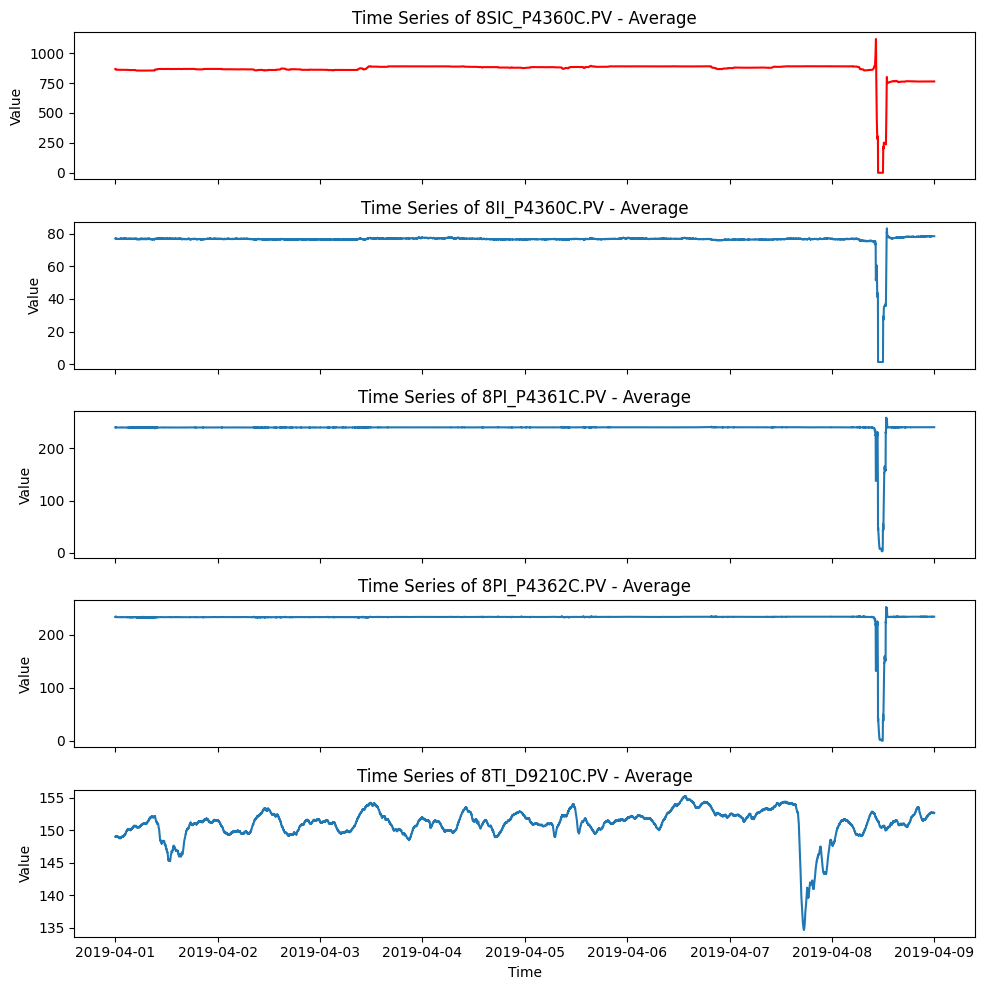

In [23]:
# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'
variables = [
    '8II_P4360C.PV - Average', 
    '8PI_P4361C.PV - Average', 
    '8PI_P4362C.PV - Average', 
    '8TI_D9210C.PV - Average'
]

# 시각화 설정 (타겟 변수를 포함한 서브플롯)
fig, axes = plt.subplots(len(variables) + 1, 1, figsize=(10, (len(variables) + 1) * 2), sharex=True)

# 타겟 변수 플롯
axes[0].plot(df.index, df[target_var], color="red")
axes[0].set_ylabel('Value')
axes[0].set_title(f'Time Series of {target_var}')

# 각 독립 변수 플롯
for i, variable in enumerate(variables, start=1):
    axes[i].plot(df.index, df[variable])
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Time Series of {variable}')

# 마지막 서브플롯 x축 라벨 설정
axes[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()

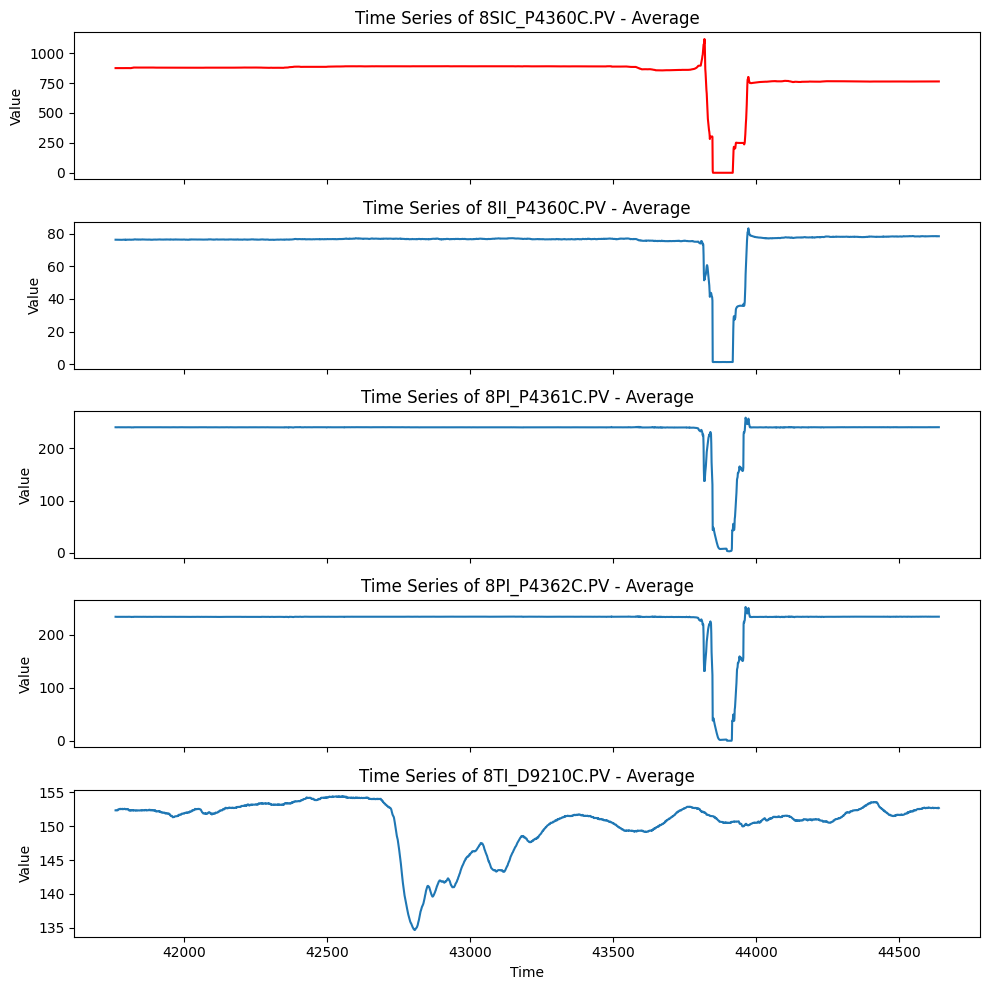

In [24]:
d1_df1 = d1_df_raw.copy()
d2_df1 = d2_df_raw.copy()

df = pd.merge(left=d1_df1, right=d2_df1, on="Timestamp", how="left")

drop_columns = ['8PI_P4251A.PV - Average', 'LAB_8CHIP_TIO2 - Average', 
                'LAB_8CHIP_HEAT - Average', 'LAB_8CHIP_SIZE - Average',
                '8FIC_P4230B.PV - Average', '8TIC_E9340.PV - Average', 
                '8FIC_P4260B.PV - Average', '8FIC_F4270B.PV - Average']
df = df.drop(columns=drop_columns)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[df['Timestamp'] > '2019-04-07 00:00:00']
#df = df.set_index('Timestamp')

# 타겟 변수 및 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'
variables = [col for col in df.columns if col != target_var and col != "Timestamp"]


# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'
variables = [
    '8II_P4360C.PV - Average', 
    '8PI_P4361C.PV - Average', 
    '8PI_P4362C.PV - Average', 
    '8TI_D9210C.PV - Average'
]

# 시각화 설정 (타겟 변수를 포함한 서브플롯)
fig, axes = plt.subplots(len(variables) + 1, 1, figsize=(10, (len(variables) + 1) * 2), sharex=True)

# 타겟 변수 플롯
axes[0].plot(df.index, df[target_var], color="red")
axes[0].set_ylabel('Value')
axes[0].set_title(f'Time Series of {target_var}')

# 각 독립 변수 플롯
for i, variable in enumerate(variables, start=1):
    axes[i].plot(df.index, df[variable])
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Time Series of {variable}')

# 마지막 서브플롯 x축 라벨 설정
axes[-1].set_xlabel('Time')

plt.tight_layout()
plt.show()

## 선형 회귀 분석

In [28]:
# 8II_P4360C.PV - Average --------------------------------------------------
# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'  # 타겟 변수
independent_var = '8II_P4360C.PV - Average'  # 독립 변수
lag = 2  # 적용할 lag 값 (상관계수 분석에 따라 2로 설정)

# Timestamp를 인덱스로 설정
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# 독립 변수에 lag 적용
df[f"{independent_var}_lag{lag}"] = df[independent_var].shift(lag)

# 결측값이 있는 행 제거
df = df[[target_var, f"{independent_var}_lag{lag}"]].dropna()

# 독립 변수와 종속 변수 설정
X = df[[f"{independent_var}_lag{lag}"]]  # 독립 변수 (lag 적용된 변수)
y = df[target_var]  # 종속 변수 (타겟 변수)

# 상수 추가 (절편)
X = sm.add_constant(X)

# 선형 회귀 모델 학습 (OLS)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())



                               OLS Regression Results                               
Dep. Variable:     8SIC_P4360C.PV - Average   R-squared:                       0.826
Model:                                  OLS   Adj. R-squared:                  0.826
Method:                       Least Squares   F-statistic:                 5.481e+04
Date:                      Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                              10:20:32   Log-Likelihood:                -57703.
No. Observations:                     11519   AIC:                         1.154e+05
Df Residuals:                         11517   BIC:                         1.154e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [31]:
# 8PI_P4361C.PV - Average --------------------------------------------------
# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'  # 타겟 변수
independent_var = '8PI_P4361C.PV - Average'  # 독립 변수
lag = 5  

# 독립 변수에 lag 적용
df[f"{independent_var}_lag{lag}"] = df[independent_var].shift(lag)

# 결측값이 있는 행 제거
df = df[[target_var, f"{independent_var}_lag{lag}"]].dropna()

# 독립 변수와 종속 변수 설정
X = df[[f"{independent_var}_lag{lag}"]]  # 독립 변수 (lag 적용된 변수)
y = df[target_var]  # 종속 변수 (타겟 변수)

# 상수 추가 (절편)
X = sm.add_constant(X)

# 선형 회귀 모델 학습 (OLS)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     8SIC_P4360C.PV - Average   R-squared:                       0.770
Model:                                  OLS   Adj. R-squared:                  0.770
Method:                       Least Squares   F-statistic:                 3.847e+04
Date:                      Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                              10:21:00   Log-Likelihood:                -59317.
No. Observations:                     11516   AIC:                         1.186e+05
Df Residuals:                         11514   BIC:                         1.187e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [33]:
# 8PI_P4362C.PV - Average --------------------------------------------------
# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'  # 타겟 변수
independent_var = '8PI_P4362C.PV - Average'  # 독립 변수
lag = 5  

# 독립 변수에 lag 적용
df[f"{independent_var}_lag{lag}"] = df[independent_var].shift(lag)

# 결측값이 있는 행 제거
df = df[[target_var, f"{independent_var}_lag{lag}"]].dropna()

# 독립 변수와 종속 변수 설정
X = df[[f"{independent_var}_lag{lag}"]]  # 독립 변수 (lag 적용된 변수)
y = df[target_var]  # 종속 변수 (타겟 변수)

# 상수 추가 (절편)
X = sm.add_constant(X)

# 선형 회귀 모델 학습 (OLS)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     8SIC_P4360C.PV - Average   R-squared:                       0.769
Model:                                  OLS   Adj. R-squared:                  0.769
Method:                       Least Squares   F-statistic:                 3.841e+04
Date:                      Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                              10:21:42   Log-Likelihood:                -59324.
No. Observations:                     11516   AIC:                         1.187e+05
Df Residuals:                         11514   BIC:                         1.187e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [35]:
# 8TI_D9210C.PV - Average --------------------------------------------------
# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'  # 타겟 변수
independent_var = '8PI_P4361C.PV - Average'  # 독립 변수
lag = 1074 

# 독립 변수에 lag 적용
df[f"{independent_var}_lag{lag}"] = df[independent_var].shift(lag)

# 결측값이 있는 행 제거
df = df[[target_var, f"{independent_var}_lag{lag}"]].dropna()

# 독립 변수와 종속 변수 설정
X = df[[f"{independent_var}_lag{lag}"]]  # 독립 변수 (lag 적용된 변수)
y = df[target_var]  # 종속 변수 (타겟 변수)

# 상수 추가 (절편)
X = sm.add_constant(X)

# 선형 회귀 모델 학습 (OLS)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     8SIC_P4360C.PV - Average   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     91.05
Date:                      Tue, 05 Nov 2024   Prob (F-statistic):           1.71e-21
Time:                              10:22:00   Log-Likelihood:                -61941.
No. Observations:                     10447   AIC:                         1.239e+05
Df Residuals:                         10445   BIC:                         1.239e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

## QQ Plot

                            OLS Regression Results                            
Dep. Variable:               y_boxcox   R-squared:                      -1.694
Model:                            OLS   Adj. R-squared:                 -1.694
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                nan
Time:                        10:57:48   Log-Likelihood:            -1.3049e+06
No. Observations:               44639   AIC:                         2.610e+06
Df Residuals:                   44638   BIC:                         2.610e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

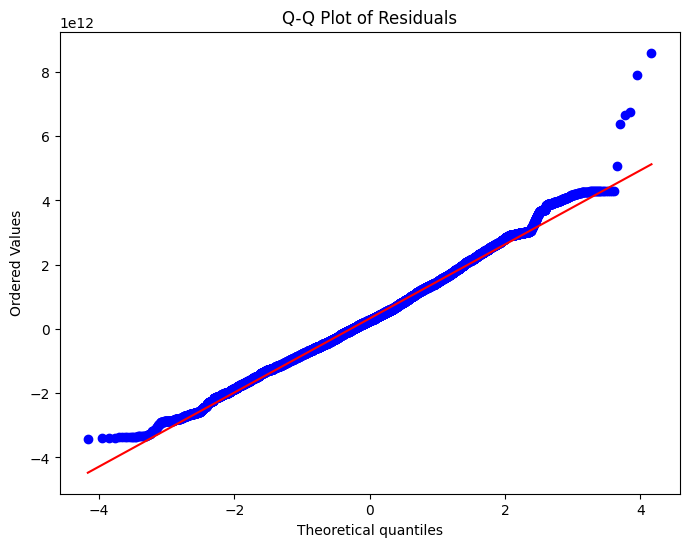

                               OLS Regression Results                               
Dep. Variable:     8SIC_P4360C.PV - Average   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     394.0
Date:                      Tue, 05 Nov 2024   Prob (F-statistic):           2.64e-87
Time:                              10:57:48   Log-Likelihood:            -2.4359e+05
No. Observations:                     44639   AIC:                         4.872e+05
Df Residuals:                         44637   BIC:                         4.872e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [38]:
# 데이터 병합
df = pd.merge(left=d1_df_raw, right=d2_df_raw, on="Timestamp", how="left")

"""
8II_P4360C.PV   
2

8PI_P4361C.PV
5

8PI_P4362C.PV
5

8TI_D9210C.PV
1074
"""

# 타겟 변수와 독립 변수 설정
target_var = '8SIC_P4360C.PV - Average'  # 타겟 변수
independent_var = '8TI_D9210C.PV - Average'  # 독립 변수
lag = 2  # 적용할 lag 값 (상관계수 분석에 따라 2로 설정)

# Timestamp를 인덱스로 설정
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

# 독립 변수에 lag 적용
df[f"{independent_var}_lag{lag}"] = df[independent_var].shift(lag)

# 결측값이 있는 행 제거
df = df[[target_var, f"{independent_var}_lag{lag}"]].dropna()

df["8SIC_P4360C.PV - Average"] += 1

sum(df["8SIC_P4360C.PV - Average"]==0)

from scipy.stats import boxcox

# 종속 변수와 독립 변수에 Box-Cox 변환 적용
y_boxcox, fitted_lambda_y = boxcox(df[target_var])
X_boxcox, fitted_lambda_x = boxcox(df[f"{independent_var}_lag{lag}"])


# 변환된 값을 데이터프레임에 추가
df['y_boxcox'] = y_boxcox
df[f"{independent_var}_lag{lag}_boxcox"] = X_boxcox

# Box-Cox 변환된 변수를 사용하여 모델 학습
X_bc = df[[f"{independent_var}_lag{lag}_boxcox"]]
X_bc = sm.add_constant(X_bc)  # 절편 추가
y_bc = df['y_boxcox']

model_boxcox = sm.OLS(y_bc, X_bc).fit()

print(model_boxcox.summary())

import scipy.stats as stats
import matplotlib.pyplot as plt

# 잔차 구하기
residuals = model_boxcox.resid

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


# 독립 변수와 종속 변수 설정
X = df[[f"{independent_var}_lag{lag}"]]  # 독립 변수 (lag 적용된 변수)
y = df[target_var]  # 종속 변수 (타겟 변수)

# 상수 추가 (절편)
X = sm.add_constant(X)

# 선형 회귀 모델 학습 (OLS)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

### YEO 존슨 변환

#from sklearn.preprocessing import PowerTransformer
#
## Yeo-Johnson 변환 적용
#pt = PowerTransformer(method='yeo-johnson')
#y_transformed = pt.fit_transform(y.values.reshape(-1, 1))
#
## 변환된 데이터를 사용해 다시 선형회귀 모델 학습
#model = sm.OLS(y_transformed, X).fit()
#print(model.summary())
#





from scipy.stats import kstest

# 잔차 구하기
residuals = model_boxcox.resid  # 일반 회귀 모델의 잔차
# residuals_huber = y - y_pred_huber  # Huber 회귀 모델의 잔차
# residuals_ransac = y - y_pred_ransac  # RANSAC 회귀 모델의 잔차

# Kolmogorov-Smirnov 검정 수행
ks_stat, p_value = kstest(residuals, 'norm')

print("K-S Statistic:", ks_stat)
print("p-value:", p_value)

# 결과 해석
if p_value < 0.05:
    print("잔차가 정규 분포를 따르지 않습니다. (유의 수준 5%)")
else:
    print("잔차가 정규 분포를 따릅니다. (유의 수준 5%)")
